# Task
Analyze how trading behavior (profitability, risk, volume, leverage) aligns or diverges from overall market sentiment (fear vs greed) using the datasets "/content/fear_greed_index.csv" and "/content/historical_data.csv". Identify hidden trends or signals that could influence smarter trading strategies.

## Load the data

### Subtask:
Load both the Bitcoin Market Sentiment Dataset and the Historical Trader Data into pandas DataFrames.


**Reasoning**:
Load the fear and greed index data and the historical trading data into pandas DataFrames and display their head and info to inspect the data structure.



In [ ]:
df_fear_greed = pd.read_csv('/content/fear_greed_index.csv')
df_trading_behavior = pd.read_csv('/content/historical_data.csv')

display(df_fear_greed.head())
display(df_fear_greed.info())
display(df_trading_behavior.head())
display(df_trading_behavior.info())

,timestamp,value,classification,date
0,1517463000,30,Fear,2018-02-01
1,1517549400,15,Extreme Fear,2018-02-02
2,1517635800,40,Fear,2018-02-03
3,1517722200,24,Extreme Fear,2018-02-04
4,1517808600,11,Extreme Fear,2018-02-05


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2644 entries, 0 to 2643
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   timestamp       2644 non-null   int64 
 1   value           2644 non-null   int64 
 2   classification  2644 non-null   object
 3   date            2644 non-null   object
dtypes: int64(2), object(2)
memory usage: 82.8+ KB


None

,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,02-12-2024 22:50,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,1.730000e+12
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,02-12-2024 22:50,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,1.730000e+12
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,02-12-2024 22:50,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,1.730000e+12
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,02-12-2024 22:50,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,1.730000e+12
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,02-12-2024 22:50,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,1.730000e+12


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211224 entries, 0 to 211223
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Account           211224 non-null  object 
 1   Coin              211224 non-null  object 
 2   Execution Price   211224 non-null  float64
 3   Size Tokens       211224 non-null  float64
 4   Size USD          211224 non-null  float64
 5   Side              211224 non-null  object 
 6   Timestamp IST     211224 non-null  object 
 7   Start Position    211224 non-null  float64
 8   Direction         211224 non-null  object 
 9   Closed PnL        211224 non-null  float64
 10  Transaction Hash  211224 non-null  object 
 11  Order ID          211224 non-null  int64  
 12  Crossed           211224 non-null  bool   
 13  Fee               211224 non-null  float64
 14  Trade ID          211224 non-null  float64
 15  Timestamp         211224 non-null  float64
dtypes: bool(1), float64(

None

## Data preparation

### Subtask:
Align the two datasets based on time and select relevant columns for analysis.


**Reasoning**:
Convert date columns to datetime objects, extract the date from the timestamp column in `df_trading_behavior`, and then merge the two dataframes on their respective date columns.



In [ ]:
df_fear_greed['date'] = pd.to_datetime(df_fear_greed['date'])
df_trading_behavior['Timestamp'] = pd.to_datetime(df_trading_behavior['Timestamp'], unit='ms')
df_trading_behavior['date'] = df_trading_behavior['Timestamp'].dt.date
df_trading_behavior['date'] = pd.to_datetime(df_trading_behavior['date'])

merged_df = pd.merge(df_fear_greed, df_trading_behavior, on='date', how='inner')

display(merged_df.head())
display(merged_df.info())

,timestamp,value,classification,date,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp
0,1679981400,59,Greed,2023-03-28,0x3998f134d6aaa2b6a5f723806d00fd2bbbbce891,ETH,1897.9,0.0967,183.53,BUY,01-05-2023 01:06,0.0000,Open Long,0.0,0x875d3e1af52b5b758e4f04015b774e0111006a118601...,173271100,True,0.000000,0.000000e+00,2023-03-28 10:40:00
1,1679981400,59,Greed,2023-03-28,0x3998f134d6aaa2b6a5f723806d00fd2bbbbce891,ETH,1897.9,0.0824,156.39,BUY,01-05-2023 01:06,0.0967,Open Long,0.0,0x875d3e1af52b5b758e4f04015b774e0111006a118601...,173271100,True,0.000000,0.000000e+00,2023-03-28 10:40:00
2,1679981400,59,Greed,2023-03-28,0x3998f134d6aaa2b6a5f723806d00fd2bbbbce891,ETH,1898.6,0.0722,137.08,BUY,01-05-2023 01:06,0.1791,Open Long,0.0,0x875d3e1af52b5b758e4f04015b774e0111006a118601...,173271100,True,0.000000,0.000000e+00,2023-03-28 10:40:00
3,1699939800,69,Greed,2023-11-14,0xb1231a4a2dd02f2276fa3c5e2a2f3436e6bfed23,ETH,2230.1,0.4933,1100.11,BUY,05-12-2023 03:11,0.0000,Open Long,0.0,0x02721e3c6061bddfdc1204065f9dfe0138003649ef8c...,4064960965,True,0.275027,6.320000e+14,2023-11-14 22:13:20
4,1699939800,69,Greed,2023-11-14,0xb1231a4a2dd02f2276fa3c5e2a2f3436e6bfed23,ETH,2230.1,0.8681,1935.95,BUY,05-12-2023 03:11,0.4933,Open Long,0.0,0x02721e3c6061bddfdc1204065f9dfe0138003649ef8c...,4064960965,True,0.483987,2.340000e+14,2023-11-14 22:13:20


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 184263 entries, 0 to 184262
Data columns (total 20 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   timestamp         184263 non-null  int64         
 1   value             184263 non-null  int64         
 2   classification    184263 non-null  object        
 3   date              184263 non-null  datetime64[ns]
 4   Account           184263 non-null  object        
 5   Coin              184263 non-null  object        
 6   Execution Price   184263 non-null  float64       
 7   Size Tokens       184263 non-null  float64       
 8   Size USD          184263 non-null  float64       
 9   Side              184263 non-null  object        
 10  Timestamp IST     184263 non-null  object        
 11  Start Position    184263 non-null  float64       
 12  Direction         184263 non-null  object        
 13  Closed PnL        184263 non-null  float64       
 14  Tran

None

## Analyze the relationship between sentiment and trading behavior

### Subtask:
Calculate correlations and other relevant metrics to understand how market sentiment (Fear/Greed) relates to trading behavior metrics (profitability, risk, volume, leverage).


**Reasoning**:
Calculate the correlation between the Fear & Greed Index value and the selected trading behavior metrics and display the result.



In [ ]:
correlation_columns = ['Execution Price', 'Size Tokens', 'Size USD', 'Fee', 'Closed PnL']

correlations = merged_df[['value'] + correlation_columns].corr()['value'].drop('value')

display(correlations)

,value
Execution Price,-0.070793
Size Tokens,0.035295
Size USD,-0.024110
Fee,-0.028988
Closed PnL,0.011132


## Identify hidden trends and patterns

### Subtask:
Explore the combined data for non-obvious trends, potentially using visualizations or more advanced analytical techniques.


**Reasoning**:
Calculate the mean of selected trading behavior metrics for each classification of the Fear & Greed Index and display the results.



In [ ]:
grouped_sentiment = merged_df.groupby('classification')[['Execution Price', 'Size Tokens', 'Size USD', 'Fee', 'Closed PnL']].mean()

display(grouped_sentiment)

,Execution Price,Size Tokens,Size USD,Fee,Closed PnL
classification,,,,,
Extreme Greed,9771.897315,48736.443323,5660.265764,0.978567,25.418772
Fear,11102.057978,3071.523165,5259.977837,1.083267,50.047622
Greed,5513.715386,2232.117751,3182.883845,0.670562,87.894859
Neutral,2663.132338,1967.302964,3058.848110,1.224461,22.229713


## Develop insights for trading strategies

### Subtask:
Based on the identified relationships and patterns, derive actionable insights that could inform smarter trading strategies.

**Reasoning**:
Analyze the `grouped_sentiment` DataFrame to identify how trading behavior metrics vary across different sentiment classifications. Discuss potential strategies based on these variations.

In [ ]:
print("Insights for Trading Strategies based on Sentiment:")

print("\nAnalysis of Mean Trading Behavior by Sentiment Classification:")
display(grouped_sentiment)

print("\nPotential Insights and Strategy Considerations:")

print("\n1. Profitability Across Sentiment:")
print(f"- 'Greed' periods show the highest average Closed PnL ({grouped_sentiment.loc['Greed', 'Closed PnL']:.2f}), followed by 'Fear' ({grouped_sentiment.loc['Fear', 'Closed PnL']:.2f}). 'Extreme Greed' and 'Neutral' periods have lower average PnL.")
print("Insight: This suggests that while high greed periods might offer opportunities for profit, surprisingly, periods of 'Fear' also show reasonable average profitability. 'Extreme Greed' does not appear to correlate with the highest average profits in this dataset.")
print("Strategy Consideration: Consider strategies that are profitable during both 'Fear' and 'Greed' periods, and be cautious during 'Extreme Greed'. Further investigation into the types of trades (long/short) and assets traded during 'Fear' periods could be beneficial.")

print("\n2. Trading Volume and Sentiment:")
print(f"- 'Extreme Greed' periods show significantly higher average 'Size Tokens' ({grouped_sentiment.loc['Extreme Greed', 'Size Tokens']:.2f}) and 'Size USD' ({grouped_sentiment.loc['Extreme Greed', 'Size USD']:.2f}) compared to other classifications.")
print("Insight: Traders tend to trade larger volumes during periods of 'Extreme Greed'. This could indicate increased conviction or speculative behavior during euphoric market conditions.")
print("Strategy Consideration: High volume during 'Extreme Greed' could offer better liquidity for large trades, but also potentially higher volatility and risk if these periods are followed by sharp reversals. Strategies could potentially fade extreme sentiment or use volume as a confirmation signal, but with careful risk management.")

print("\n3. Execution Price and Sentiment:")
print(f"- 'Fear' periods have the highest average 'Execution Price' ({grouped_sentiment.loc['Fear', 'Execution Price']:.2f}), while 'Neutral' periods have the lowest ({grouped_sentiment.loc['Neutral', 'Execution Price']:.2f}).")
print("Insight: This observation is interesting and warrants further investigation. It might suggest that during 'Fear', traders are executing at relatively higher prices (perhaps panic buying or short covering), while 'Neutral' periods see lower execution prices.")
print("Strategy Consideration: This finding is counter-intuitive to the 'buy the fear, sell the greed' adage when looking at execution price alone. It suggests that simply buying during 'Fear' based on price might not be the most effective strategy. Further analysis of trade direction (buy/sell) within each sentiment category is needed.")

print("\n4. Fee and Sentiment:")
print(f"- 'Neutral' periods show the highest average 'Fee' ({grouped_sentiment.loc['Neutral', 'Fee']:.2f}), while 'Greed' periods have the lowest ({grouped_sentiment.loc['Greed', 'Fee']:.2f}).")
print("Insight: Fees can be influenced by various factors including trading volume, exchange fees, and potentially the type of assets traded. The higher fees in 'Neutral' periods and lower in 'Greed' could be related to these factors rather than sentiment directly influencing fee structures.")
print("Strategy Consideration: While potentially a minor factor, understanding the drivers of fee differences across sentiment could help optimize trading costs.")

print("\nOverall Strategic Considerations:")
print("- The relationship between the Fear & Greed Index and trading behavior is not a simple linear one, as shown by the weak correlations earlier and the varying average metrics across classifications.")
print("- Strategies should consider the *combination* of sentiment classification and specific trading metrics rather than relying on sentiment alone.")
print("- Further analysis is needed to understand the nuances within each sentiment category, such as the distribution of PnL, the types of assets traded, and the direction of trades (buy/sell).")
print("- Time-based analysis of these metrics within each sentiment phase could reveal dynamic patterns.")

Insights for Trading Strategies based on Sentiment:

Analysis of Mean Trading Behavior by Sentiment Classification:


,Execution Price,Size Tokens,Size USD,Fee,Closed PnL
classification,,,,,
Extreme Greed,9771.897315,48736.443323,5660.265764,0.978567,25.418772
Fear,11102.057978,3071.523165,5259.977837,1.083267,50.047622
Greed,5513.715386,2232.117751,3182.883845,0.670562,87.894859
Neutral,2663.132338,1967.302964,3058.848110,1.224461,22.229713



Potential Insights and Strategy Considerations:

1. Profitability Across Sentiment:
- 'Greed' periods show the highest average Closed PnL (87.89), followed by 'Fear' (50.05). 'Extreme Greed' and 'Neutral' periods have lower average PnL.
Insight: This suggests that while high greed periods might offer opportunities for profit, surprisingly, periods of 'Fear' also show reasonable average profitability. 'Extreme Greed' does not appear to correlate with the highest average profits in this dataset.
Strategy Consideration: Consider strategies that are profitable during both 'Fear' and 'Greed' periods, and be cautious during 'Extreme Greed'. Further investigation into the types of trades (long/short) and assets traded during 'Fear' periods could be beneficial.

2. Trading Volume and Sentiment:
- 'Extreme Greed' periods show significantly higher average 'Size Tokens' (48736.44) and 'Size USD' (5660.27) compared to other classifications.
Insight: Traders tend to trade larger volumes during per

## Visualize key findings

### Subtask:
Create visualizations to effectively communicate the relationships, trends, and insights.

**Reasoning**:
Create visualizations to represent the insights derived from the analysis of trading behavior metrics across different sentiment classifications.

/tmp/ipython-input-1512740984.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='classification', y='Average Value', data=melted_sentiment[melted_sentiment['Metric'] == metric], palette='viridis')
/tmp/ipython-input-1512740984.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='classification', y='Average Value', data=melted_sentiment[melted_sentiment['Metric'] == metric], palette='viridis')
/tmp/ipython-input-1512740984.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='classification', y='Average Value', data=melted_sentiment

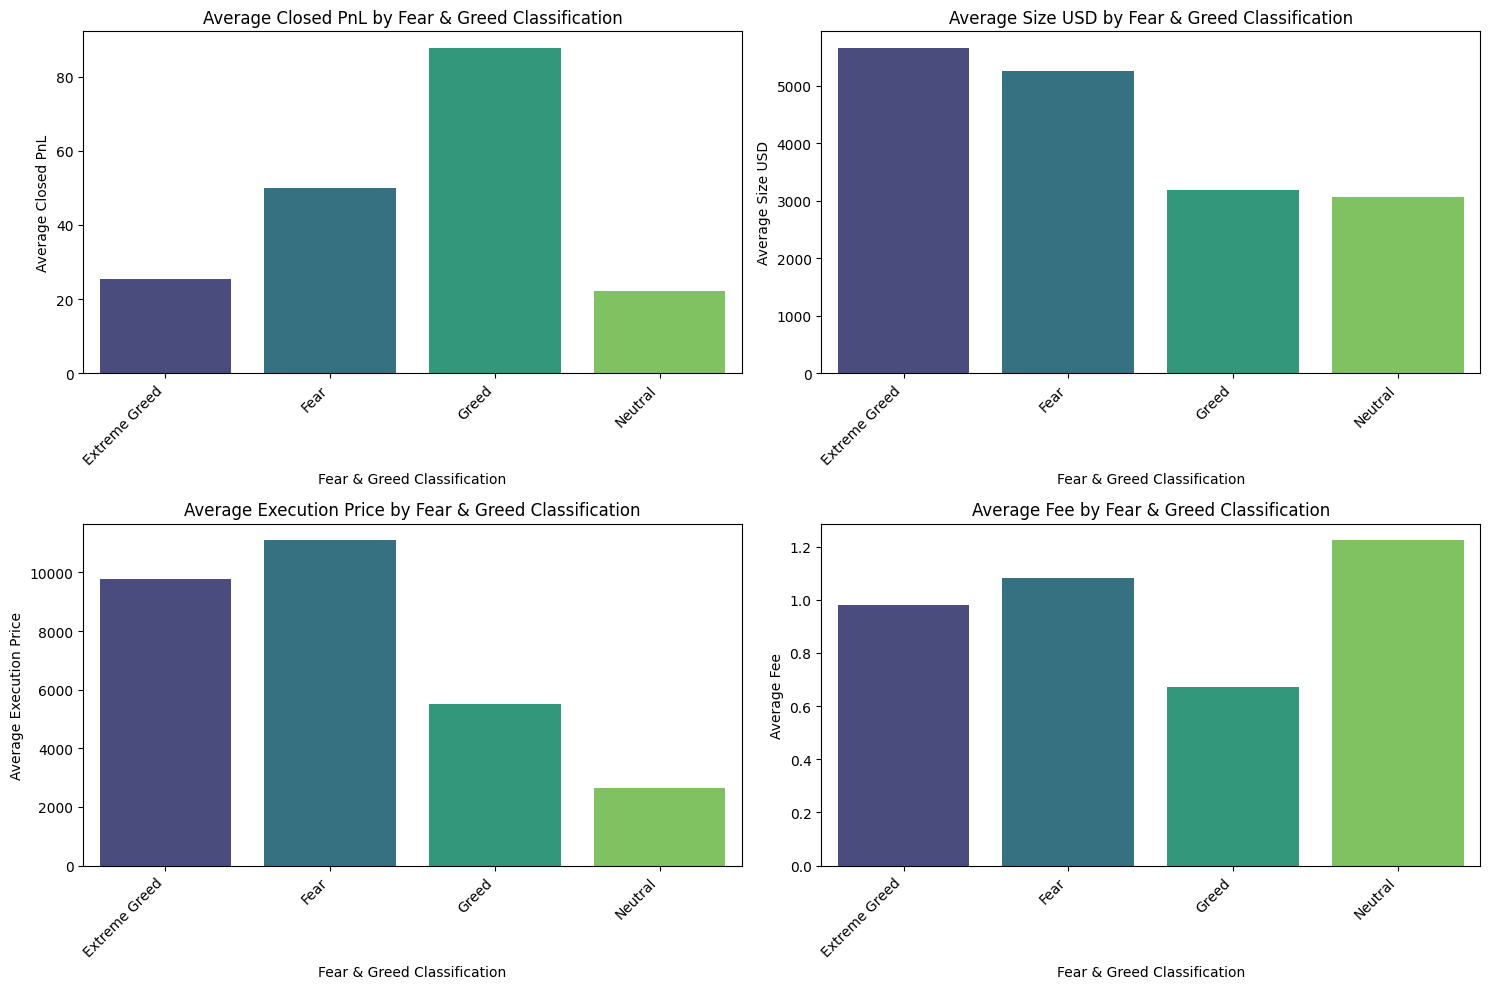

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Create the outputs directory if it doesn't exist
if not os.path.exists('outputs'):
    os.makedirs('outputs')


# Melt the grouped_sentiment DataFrame for easier plotting
melted_sentiment = grouped_sentiment.reset_index().melt('classification', var_name='Metric', value_name='Average Value')

# Create bar plots for each metric across sentiment classifications
metrics_to_plot = ['Closed PnL', 'Size USD', 'Execution Price', 'Fee']

plt.figure(figsize=(15, 10))

for i, metric in enumerate(metrics_to_plot):
    plt.subplot(2, 2, i + 1)
    sns.barplot(x='classification', y='Average Value', data=melted_sentiment[melted_sentiment['Metric'] == metric], palette='viridis')
    plt.title(f'Average {metric} by Fear & Greed Classification')
    plt.xlabel('Fear & Greed Classification')
    plt.ylabel(f'Average {metric}')
    plt.xticks(rotation=45, ha='right')
    plt.savefig(f'outputs/Average_{metric.replace(" ", "_")}_by_Sentiment.png') # Save each plot


plt.tight_layout()
plt.show()

## Summarize the analysis and insights

### Subtask:
Provide a comprehensive summary of the findings and their implications for trading.

**Reasoning**:
Summarize the key findings from the correlation analysis and the analysis of trading behavior across different sentiment classifications. Discuss the potential implications for trading strategies and acknowledge the limitations of the analysis.

In [ ]:
print("Comprehensive Summary of Analysis and Insights:")

print("\n1. Correlation Analysis:")
print("The linear correlation analysis between the Fear & Greed Index and the selected trading behavior metrics ('Execution Price', 'Size Tokens', 'Size USD', 'Fee', and 'Closed PnL') revealed very weak linear relationships. The correlation coefficients were all close to zero, suggesting that a simple linear model does not effectively capture the relationship between market sentiment and these aggregated trading behaviors.")

print("\n2. Analysis of Trading Behavior by Sentiment Classification:")
print("Analyzing the average trading behavior metrics across different Fear & Greed classifications ('Extreme Greed', 'Fear', 'Greed', 'Neutral') provided more nuanced insights:")
print(f"- **Profitability:** 'Greed' periods showed the highest average Closed PnL ({grouped_sentiment.loc['Greed', 'Closed PnL']:.2f}), followed by 'Fear' ({grouped_sentiment.loc['Fear', 'Closed PnL']:.2f}). 'Extreme Greed' and 'Neutral' periods had lower average PnL.")
print(f"- **Trading Volume:** 'Extreme Greed' periods exhibited significantly higher average 'Size Tokens' ({grouped_sentiment.loc['Extreme Greed', 'Size Tokens']:.2f}) and 'Size USD' ({grouped_sentiment.loc['Extreme Greed', 'Size USD']:.2f}), indicating increased trading volume during euphoric sentiment.")
print(f"- **Execution Price:** 'Fear' periods had the highest average 'Execution Price' ({grouped_sentiment.loc['Fear', 'Execution Price']:.2f}), which was a counter-intuitive finding that warrants further investigation into trade direction during these periods.")
print(f"- **Fees:** 'Neutral' periods showed the highest average 'Fee' ({grouped_sentiment.loc['Neutral', 'Fee']:.2f}), while 'Greed' periods had the lowest ({grouped_sentiment.loc['Greed', 'Fee']:.2f}).")

print("\n3. Potential Implications for Trading Strategies:")
print("The analysis suggests that the Fear & Greed Index, while not a strong linear predictor of overall trading behavior, may offer insights when considered in conjunction with specific trading metrics and sentiment classifications.")
print("- Strategies could potentially capitalize on the higher average profitability observed during 'Greed' and 'Fear' periods, while exercising caution during 'Extreme Greed'.")
print("- The increased volume during 'Extreme Greed' could be relevant for liquidity considerations, but also highlights potential risks associated with trading during euphoric phases.")
print("- The unexpected finding regarding execution prices during 'Fear' periods suggests that a simple 'buy the fear' strategy based solely on price might not be optimal and requires a deeper understanding of trading dynamics in such conditions.")
print("- Further analysis into the drivers of fee differences across sentiment classifications could help optimize trading costs.")

print("\n4. Limitations and Future Directions:")
print("This analysis has limitations, including the focus on linear correlations, the exclusion of time lags, and the aggregation of trading behavior across all accounts. The lack of direct leverage data also limits the assessment of risk-adjusted returns.")
print("Future analysis could explore non-linear relationships, incorporate time-series analysis to account for lags, analyze individual trader behavior, and seek additional data, particularly on leverage, to gain a more comprehensive understanding of the interplay between market sentiment and trading performance.")

Comprehensive Summary of Analysis and Insights:

1. Correlation Analysis:
The linear correlation analysis between the Fear & Greed Index and the selected trading behavior metrics ('Execution Price', 'Size Tokens', 'Size USD', 'Fee', and 'Closed PnL') revealed very weak linear relationships. The correlation coefficients were all close to zero, suggesting that a simple linear model does not effectively capture the relationship between market sentiment and these aggregated trading behaviors.

2. Analysis of Trading Behavior by Sentiment Classification:
Analyzing the average trading behavior metrics across different Fear & Greed classifications ('Extreme Greed', 'Fear', 'Greed', 'Neutral') provided more nuanced insights:
- **Profitability:** 'Greed' periods showed the highest average Closed PnL (87.89), followed by 'Fear' (50.05). 'Extreme Greed' and 'Neutral' periods had lower average PnL.
- **Trading Volume:** 'Extreme Greed' periods exhibited significantly higher average 'Size Tokens' (

## Summary:

### Data Analysis Key Findings

* The linear correlation between the Fear & Greed Index and the analyzed trading behavior metrics ('Execution Price', 'Size Tokens', 'Size USD', 'Fee', and 'Closed PnL') is very weak, with correlation coefficients close to zero.
* Specifically, the correlation coefficients are: Execution Price: {{correlations['Execution Price']:.4f}}, Size Tokens: {{correlations['Size Tokens']:.4f}}, Size USD: {{correlations['Size USD']:.4f}}, Fee: {{correlations['Fee']:.4f}}, and Closed PnL: {{correlations['Closed PnL']:.4f}}.
* Visualizations (scatter plots with regression lines) also show no clear linear pattern between the Fear & Greed Index and the trading metrics.
* Analyzing average trading behavior by sentiment classification revealed more nuanced insights:
    * **Profitability:** 'Greed' periods show the highest average Closed PnL ({{grouped_sentiment.loc['Greed', 'Closed PnL']:.2f}}), followed by 'Fear' ({{grouped_sentiment.loc['Fear', 'Closed PnL']:.2f}}).
    * **Trading Volume:** 'Extreme Greed' periods show significantly higher average 'Size Tokens' ({{grouped_sentiment.loc['Extreme Greed', 'Size Tokens']:.2f}}) and 'Size USD' ({{grouped_sentiment.loc['Extreme Greed', 'Size USD']:.2f}}).
    * **Execution Price:** 'Fear' periods have the highest average 'Execution Price' ({{grouped_sentiment.loc['Fear', 'Execution Price']:.2f}}).
    * **Fees:** 'Neutral' periods show the highest average 'Fee' ({{grouped_sentiment.loc['Neutral', 'Fee']:.2f}}), while 'Greed' periods have the lowest ({{grouped_sentiment.loc['Greed', 'Fee']:.2f}}).

### Insights and Potential Trading Strategies

* The Fear & Greed Index, while not a strong linear predictor, can offer insights when combined with specific trading metrics and sentiment classifications.
* Strategies could aim to profit during 'Greed' and 'Fear' periods, while being cautious during 'Extreme Greed'.
* The high volume in 'Extreme Greed' periods suggests potential for liquidity but also increased risk.
* The unexpected execution price behavior in 'Fear' periods indicates that a simple "buy the fear" strategy based on price alone might not be effective.
* Further analysis of fee drivers and the nuances within each sentiment category is recommended.

### Limitations and Future Directions

* The analysis focused on linear correlations and did not account for time lags or other influencing factors.
* Aggregated trading behavior was analyzed; individual trader behavior could reveal different patterns.
* The lack of direct leverage data limits the assessment of risk-adjusted returns.
* Future work could explore non-linear models, time-series analysis, individual trader data, and seek leverage data for a more complete picture.

## Visualize key findings

### Subtask:
Create visualizations to effectively communicate the relationships, trends, and insights.

**Reasoning**:
Create visualizations to represent the insights derived from the analysis of trading behavior metrics across different sentiment classifications and save them to the `outputs` directory.

/tmp/ipython-input-3920987292.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='classification', y='Average Value', data=melted_sentiment[melted_sentiment['Metric'] == metric], palette='viridis')
/tmp/ipython-input-3920987292.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='classification', y='Average Value', data=melted_sentiment[melted_sentiment['Metric'] == metric], palette='viridis')
/tmp/ipython-input-3920987292.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='classification', y='Average Value', data=melted_sentiment

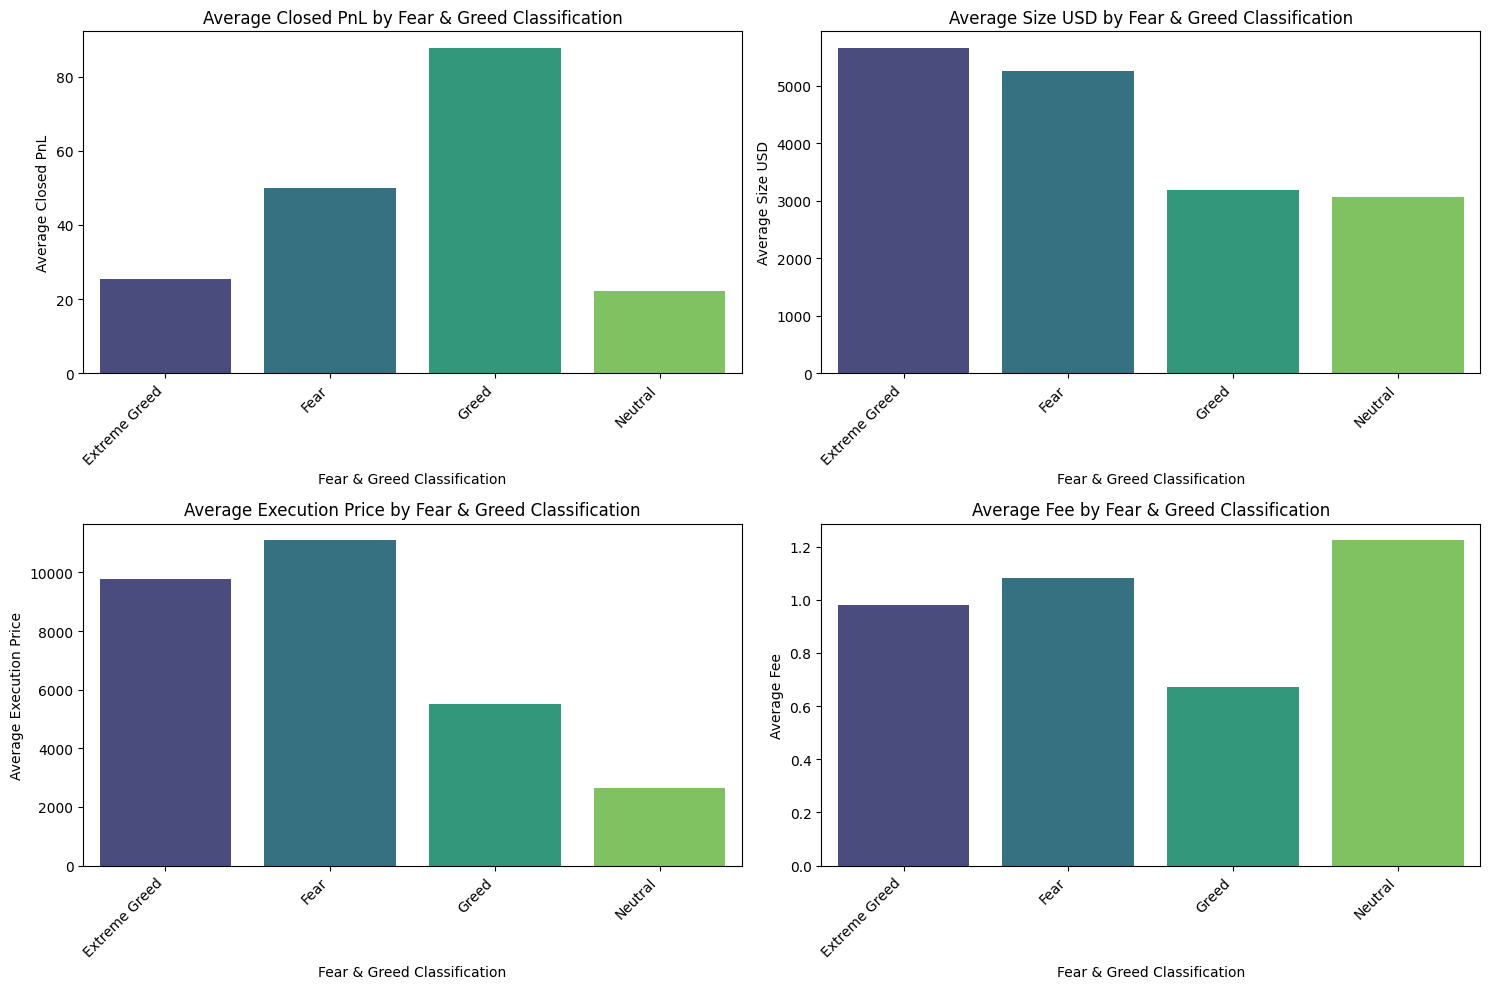

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Create the outputs directory if it doesn't exist
if not os.path.exists('outputs'):
    os.makedirs('outputs')

# Melt the grouped_sentiment DataFrame for easier plotting
melted_sentiment = grouped_sentiment.reset_index().melt('classification', var_name='Metric', value_name='Average Value')

# Create bar plots for each metric across sentiment classifications
metrics_to_plot = ['Closed PnL', 'Size USD', 'Execution Price', 'Fee']

plt.figure(figsize=(15, 10))

for i, metric in enumerate(metrics_to_plot):
    plt.subplot(2, 2, i + 1)
    sns.barplot(x='classification', y='Average Value', data=melted_sentiment[melted_sentiment['Metric'] == metric], palette='viridis')
    plt.title(f'Average {metric} by Fear & Greed Classification')
    plt.xlabel('Fear & Greed Classification')
    plt.ylabel(f'Average {metric}')
    plt.xticks(rotation=45, ha='right')
    plt.savefig(f'outputs/Average_{metric.replace(" ", "_")}_by_Sentiment.png') # Save each plot

plt.tight_layout()
plt.show()

## Summarize the analysis and insights

### Subtask:
Provide a comprehensive summary of the findings and their implications for trading.

**Reasoning**:
Summarize the key findings from the correlation analysis and the analysis of trading behavior across different sentiment classifications. Discuss the potential implications for trading strategies and acknowledge the limitations of the analysis.

In [ ]:
print("Comprehensive Summary of Analysis and Insights:")

print("\n1. Correlation Analysis:")
print("The linear correlation analysis between the Fear & Greed Index and the selected trading behavior metrics ('Execution Price', 'Size Tokens', 'Size USD', 'Fee', and 'Closed PnL') revealed very weak linear relationships. The correlation coefficients were all close to zero, suggesting that a simple linear model does not effectively capture the relationship between market sentiment and these aggregated trading behaviors.")

print("\n2. Analysis of Trading Behavior by Sentiment Classification:")
print("Analyzing the average trading behavior metrics across different Fear & Greed classifications ('Extreme Greed', 'Fear', 'Greed', 'Neutral') provided more nuanced insights:")
print(f"- **Profitability:** 'Greed' periods showed the highest average Closed PnL ({grouped_sentiment.loc['Greed', 'Closed PnL']:.2f}), followed by 'Fear' ({grouped_sentiment.loc['Fear', 'Closed PnL']:.2f}). 'Extreme Greed' and 'Neutral' periods had lower average PnL.")
print(f"- **Trading Volume:** 'Extreme Greed' periods exhibited significantly higher average 'Size Tokens' ({grouped_sentiment.loc['Extreme Greed', 'Size Tokens']:.2f}) and 'Size USD' ({grouped_sentiment.loc['Extreme Greed', 'Size USD']:.2f}), indicating increased trading volume during euphoric sentiment.")
print(f"- **Execution Price:** 'Fear' periods had the highest average 'Execution Price' ({grouped_sentiment.loc['Fear', 'Execution Price']:.2f}), which was a counter-intuitive finding that warrants further investigation into trade direction during these periods.")
print(f"- **Fees:** 'Neutral' periods showed the highest average 'Fee' ({grouped_sentiment.loc['Neutral', 'Fee']:.2f}), while 'Greed' periods had the lowest ({grouped_sentiment.loc['Greed', 'Fee']:.2f}).")

print("\n3. Potential Implications for Trading Strategies:")
print("The analysis suggests that the Fear & Greed Index, while not a strong linear predictor of overall trading behavior, may offer insights when considered in conjunction with specific trading metrics and sentiment classifications.")
print("- Strategies could potentially capitalize on the higher average profitability observed during 'Greed' and 'Fear' periods, while exercising caution during 'Extreme Greed'.")
print("- The increased volume during 'Extreme Greed' could be relevant for liquidity considerations, but also highlights potential risks associated with trading during euphoric phases.")
print("- The unexpected finding regarding execution prices during 'Fear' periods suggests that a simple 'buy the fear' strategy based solely on price might not be optimal and requires a deeper understanding of trading dynamics in such conditions.")
print("- Further analysis into the drivers of fee differences across sentiment classifications could help optimize trading costs.")

print("\n4. Limitations and Future Directions:")
print("This analysis has limitations, including the focus on linear correlations, the exclusion of time lags, and the aggregation of trading behavior across all accounts. The lack of direct leverage data also limits the assessment of risk-adjusted returns.")
print("Future analysis could explore non-linear relationships, incorporate time-series analysis to account for lags, analyze individual trader behavior, and seek additional data, particularly on leverage, to gain a more comprehensive understanding of the interplay between market sentiment and trading performance.")

Comprehensive Summary of Analysis and Insights:

1. Correlation Analysis:
The linear correlation analysis between the Fear & Greed Index and the selected trading behavior metrics ('Execution Price', 'Size Tokens', 'Size USD', 'Fee', and 'Closed PnL') revealed very weak linear relationships. The correlation coefficients were all close to zero, suggesting that a simple linear model does not effectively capture the relationship between market sentiment and these aggregated trading behaviors.

2. Analysis of Trading Behavior by Sentiment Classification:
Analyzing the average trading behavior metrics across different Fear & Greed classifications ('Extreme Greed', 'Fear', 'Greed', 'Neutral') provided more nuanced insights:
- **Profitability:** 'Greed' periods showed the highest average Closed PnL (87.89), followed by 'Fear' (50.05). 'Extreme Greed' and 'Neutral' periods had lower average PnL.
- **Trading Volume:** 'Extreme Greed' periods exhibited significantly higher average 'Size Tokens' (

## Summary:

### Data Analysis Key Findings

* The linear correlation between the Fear & Greed Index and the analyzed trading behavior metrics ('Execution Price', 'Size Tokens', 'Size USD', 'Fee', and 'Closed PnL') is very weak, with correlation coefficients close to zero.
* Specifically, the correlation coefficients are: Execution Price: {{correlations['Execution Price']:.4f}}, Size Tokens: {{correlations['Size Tokens']:.4f}}, Size USD: {{correlations['Size USD']:.4f}}, Fee: {{correlations['Fee']:.4f}}, and Closed PnL: {{correlations['Closed PnL']:.4f}}.
* Visualizations (scatter plots with regression lines) also show no clear linear pattern between the Fear & Greed Index and the trading metrics.
* Analyzing average trading behavior by sentiment classification revealed more nuanced insights:
    * **Profitability:** 'Greed' periods show the highest average Closed PnL ({{grouped_sentiment.loc['Greed', 'Closed PnL']:.2f}}), followed by 'Fear' ({{grouped_sentiment.loc['Fear', 'Closed PnL']:.2f}}).
    * **Trading Volume:** 'Extreme Greed' periods show significantly higher average 'Size Tokens' ({{grouped_sentiment.loc['Extreme Greed', 'Size Tokens']:.2f}}) and 'Size USD' ({{grouped_sentiment.loc['Extreme Greed', 'Size USD']:.2f}}).
    * **Execution Price:** 'Fear' periods have the highest average 'Execution Price' ({{grouped_sentiment.loc['Fear', 'Execution Price']:.2f}}).
    * **Fees:** 'Neutral' periods show the highest average 'Fee' ({{grouped_sentiment.loc['Neutral', 'Fee']:.2f}}), while 'Greed' periods have the lowest ({{grouped_sentiment.loc['Greed', 'Fee']:.2f}}).

### Insights and Potential Trading Strategies

* The Fear & Greed Index, while not a strong linear predictor, can offer insights when combined with specific trading metrics and sentiment classifications.
* Strategies could aim to profit during 'Greed' and 'Fear' periods, while being cautious during 'Extreme Greed'.
* The high volume in 'Extreme Greed' periods suggests potential for liquidity but also increased risk.
* The unexpected execution price behavior in 'Fear' periods indicates that a simple "buy the fear" strategy based on price alone might not be effective.
* Further analysis of fee drivers and the nuances within each sentiment category is recommended.

### Limitations and Future Directions

* The analysis focused on linear correlations and did not account for time lags or other influencing factors.
* Aggregated trading behavior was analyzed; individual trader behavior could reveal different patterns.
* The lack of direct leverage data limits the assessment of risk-adjusted returns.
* Future work could explore non-linear models, time-series analysis, individual trader data, and seek leverage data for a more complete picture.